In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
compras_df = pd.read_csv('tdata/compras_df_enriched.csv')

In [3]:
data=compras_df.copy()

## Llenar los valores faltantes del dataframe

In [5]:
#utiliza el for con un indice para en una lista almacenar el tipo de dato en cadena
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    #si el tipo de dato es object
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [6]:
data.head(5)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET,DIA,MES,ANIO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO
0,123803,373,385,16851,5184,13840,1,1025275.0,0,389093.21,3,30.0,1.0,2023.0,3,433899.519719
1,206273,2055,1924,979,26,7992,1,1025278.0,0,6564.00,3,30.0,1.0,2023.0,16,433899.519719
2,206273,2055,1924,980,26,7993,1,1025279.0,0,6418.00,3,30.0,1.0,2023.0,16,433899.519719
3,206273,2055,1924,1576,26,10456,1,332000144.0,0,110220.65,3,30.0,1.0,2023.0,16,433899.519719
4,206273,2055,1924,1578,26,10453,1,332000145.0,0,400123.00,3,30.0,1.0,2023.0,16,433899.519719


## utilizar random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = data.pop('IMPORTE')
X = data.copy()

## Dividir los datos en dos grupos

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
clf = RandomForestRegressor(n_estimators=1000, max_depth = 4)

In [12]:
clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(y_test, clf.predict(X_test))

0.07536087956713078

## modelo no supervisado

In [15]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning,module="sklearn")
from sklearn.cluster import KMeans

In [16]:
df_copy=compras_df.copy()

In [17]:
df_copy.head(3)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET,DIA,MES,ANIO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO
0,123803,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,CIC710521SA1,P 1214-185004-4,SIS-172-2022,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...,TR,1025275.0,2023-01-30,389093.21,OBRA PUBLICA Y GV FDOS. ESP,30.0,1.0,2023.0,3,433899.519719
1,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,124000760-183001-8,NO APLICA,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...,TR,1025278.0,2023-01-30,6564.00,OBRA PUBLICA Y GV FDOS. ESP,30.0,1.0,2023.0,16,433899.519719
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,124000771-183001-7,NO APLICA,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...,TR,1025279.0,2023-01-30,6418.00,OBRA PUBLICA Y GV FDOS. ESP,30.0,1.0,2023.0,16,433899.519719


In [19]:
# Se consideran las varibales CB, CONTRATO,IMPORTE, FACTURA
columns_to_drop = ['BENEFICIARIO', 'CONCEPTO', 'MES', 'SHEET','RFC','TIPO','FDO - #OP','FECHA']
df_copy = df_copy.drop(columns=columns_to_drop)
df_copy

,C B,FACTURAS,CONTRATO,IMPORTE,DIA,ANIO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO
0,123803,P 1214-185004-4,SIS-172-2022,389093.21,30.0,2023.0,3,433899.519719
1,206273,124000760-183001-8,NO APLICA,6564.00,30.0,2023.0,16,433899.519719
2,206273,124000771-183001-7,NO APLICA,6418.00,30.0,2023.0,16,433899.519719
3,206273,183006-1,NO APLICA,110220.65,30.0,2023.0,16,433899.519719
4,206273,183006-2,NO APLICA,400123.00,30.0,2023.0,16,433899.519719
...,...,...,...,...,...,...,...,...
17525,203016,103992-183010-2632,NO APLICA,2064.20,12.0,2023.0,10,43698.905812
17526,203016,103992-183010-2763,NO APLICA,2064.20,19.0,2023.0,10,43698.905812
17527,203016,103992-183010-2739,NO APLICA,2064.20,19.0,2023.0,10,43698.905812
17528,203016,104651-183010-2529,NO APLICA,5563.47,13.0,2023.0,3,43698.905812


In [20]:
for i, column in enumerate(list([str(d) for d in df_copy.dtypes])):
    if column == "object":
        df_copy[df_copy.columns[i]] = df_copy[df_copy.columns[i]].fillna(df_copy[df_copy.columns[i]].mode()[0])
        df_copy[df_copy.columns[i]] = df_copy[df_copy.columns[i]].astype("category").cat.codes
    else:
        df_copy[df_copy.columns[i]] = df_copy[df_copy.columns[i]].fillna(df_copy[df_copy.columns[i]].median())

In [21]:
# normalizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_copy)
df_nor = pd.DataFrame(normalized_data, columns=df_copy.columns)
df_nor

,C B,FACTURAS,CONTRATO,IMPORTE,DIA,ANIO,BENEFICIARIO_SALES,IMPORTE_GASTO_PROMEDIO
0,0.015469,0.965839,0.938111,0.003838,0.966667,0.0,0.000663,0.541108
1,0.108136,0.056113,0.004705,0.000065,0.966667,0.0,0.004972,0.541108
2,0.108136,0.056170,0.004705,0.000063,0.966667,0.0,0.004972,0.541108
3,0.108136,0.090331,0.004705,0.001087,0.966667,0.0,0.004972,0.541108
4,0.108136,0.090445,0.004705,0.003947,0.966667,0.0,0.004972,0.541108
...,...,...,...,...,...,...,...,...
17525,0.104476,0.011750,0.004705,0.000020,0.366667,0.0,0.002983,0.031374
17526,0.104476,0.011922,0.004705,0.000020,0.600000,0.0,0.002983,0.031374
17527,0.104476,0.011865,0.004705,0.000020,0.600000,0.0,0.002983,0.031374
17528,0.104476,0.013240,0.004705,0.000055,0.400000,0.0,0.000663,0.031374


In [22]:
wcss = []

# Iteramos numeros de clusters de 1 a 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=100, random_state=1)
    kmeans.fit(df_nor)  
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

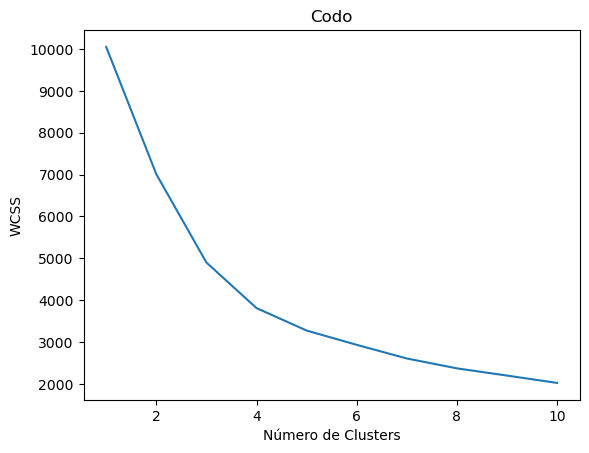

In [25]:
# Graficar Elbow 
plt.plot(range(1, 11), wcss)
plt.title('Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  
plt.show()

In [26]:
clustering = KMeans(n_clusters=4, max_iter=300, random_state=42)
clustering.fit(df_nor)
df_copy['kmeans_c']=clustering.labels_
df_copy['kmeans_c'].value_counts()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans_c
2    8118
3    4513
0    3018
1    1881
Name: count, dtype: int64

In [28]:
# Aplicamos PCA 2 dimensiones
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_com=pca.fit_transform(df_nor)
pca_com_df=pd.DataFrame(data=pca_com,columns=['componente_1','componente_2'])
pca_nom_bene=pd.concat([pca_com_df,df_copy['kmeans_c']],axis=1)
pca_nom_bene

,componente_1,componente_2,kmeans_c
0,0.269577,-0.081026,2
1,-0.704479,0.076698,1
2,-0.704459,0.076683,1
3,-0.692943,0.067749,3
4,-0.692910,0.067700,3
...,...,...,...
17525,-0.651228,0.640208,1
17526,-0.663228,0.614077,1
17527,-0.663247,0.614092,1
17528,-0.653833,0.636263,1


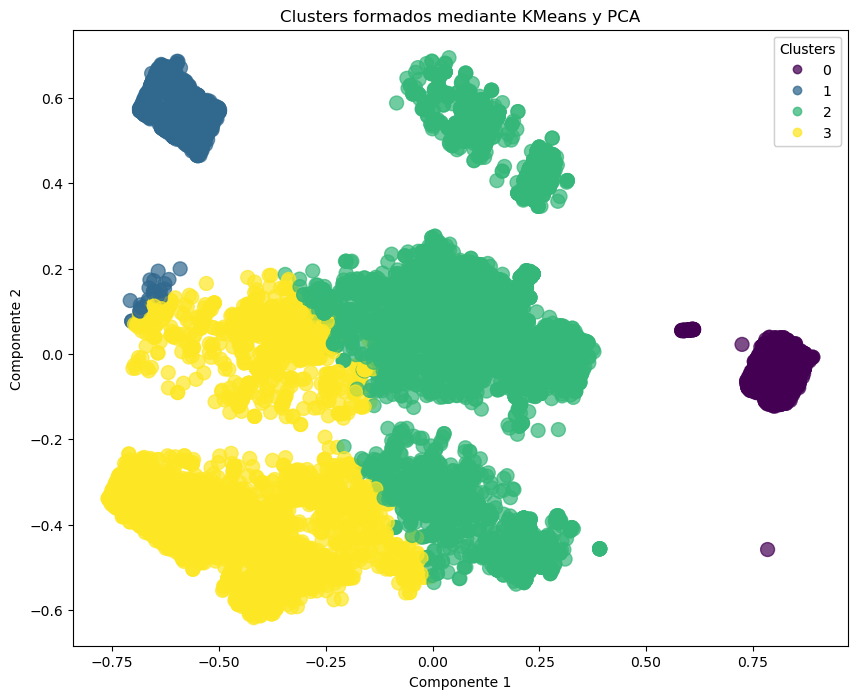

In [29]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    pca_nom_bene['componente_1'], 
    pca_nom_bene['componente_2'], 
    c=pca_nom_bene['kmeans_c'], 
    cmap='viridis', 
    s=100, 
    alpha=0.7
)
plt.title('Clusters formados mediante KMeans y PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

lege=plt.legend(*scatter.legend_elements(),title='Clusters')
plt.gca().add_artist(lege)